<a href="https://colab.research.google.com/github/CharlyWheels/Carlos_Rueda_TFM/blob/colab/Labepc_ML_standard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labdata.csv')
df.shape

(1173, 38)

In [116]:
df.drop(['id', 'reference','epc','score', 'antennas', 'rssiValue', 'timeStamp', 'lastModification'], axis=1, inplace=True)
df.shape

(1173, 30)

<Axes: xlabel='desired', ylabel='count'>

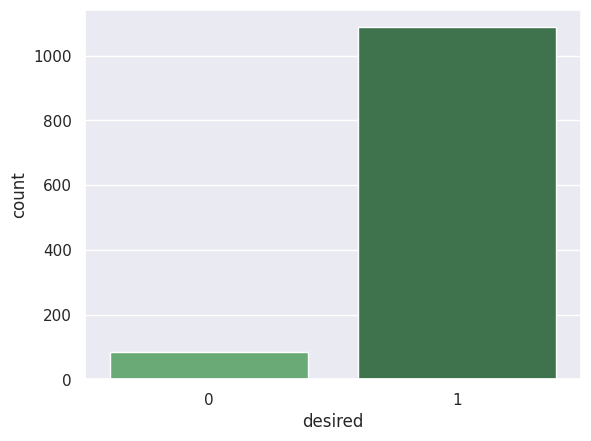

In [117]:
sns.countplot(x="desired", data=df, palette="Greens_d")

In [118]:
class_dist = df['desired'].value_counts()

print(class_dist)
prob_e = class_dist[0]/(class_dist[0]+class_dist[1])
prob_p = 1 - prob_e
print(prob_e)
print(prob_p)

1    1088
0      85
Name: desired, dtype: int64
0.07246376811594203
0.927536231884058


In [119]:
print(df.columns)

Index(['count', 'maxRssiValue', 'minRssiValue', 'maxTimeStamp', 'minTimeStamp',
       'rssiDiff', 'seenDiff', 'antenna1', 'antenna2', 'antenna3', 'antenna4',
       'ts_percent0', 'ts_percent1', 'ts_percent2', 'ts_percent3',
       'ts_percent4', 'ts_percent5', 'ts_percent6', 'ts_percent7',
       'ts_percent8', 'rv_percent0', 'rv_percent1', 'rv_percent2',
       'rv_percent3', 'rv_percent4', 'rv_percent5', 'rv_percent6',
       'rv_percent7', 'rv_percent8', 'desired'],
      dtype='object')


In [120]:
from sklearn.utils import resample

df_majority = df[df.desired==1]
df_minority = df[df.desired==0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=1088, random_state=123)


In [121]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # type: ignore


In [122]:
print(df_upsampled.columns)

Index(['count', 'maxRssiValue', 'minRssiValue', 'maxTimeStamp', 'minTimeStamp',
       'rssiDiff', 'seenDiff', 'antenna1', 'antenna2', 'antenna3', 'antenna4',
       'ts_percent0', 'ts_percent1', 'ts_percent2', 'ts_percent3',
       'ts_percent4', 'ts_percent5', 'ts_percent6', 'ts_percent7',
       'ts_percent8', 'rv_percent0', 'rv_percent1', 'rv_percent2',
       'rv_percent3', 'rv_percent4', 'rv_percent5', 'rv_percent6',
       'rv_percent7', 'rv_percent8', 'desired'],
      dtype='object')


In [123]:
class_dist = df_upsampled['desired'].value_counts()

print(class_dist)

1    1088
0    1088
Name: desired, dtype: int64


In [124]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_upsampled.columns:
    df_upsampled[col] = labelencoder.fit_transform(df_upsampled[col])

df_upsampled.head()

,count,maxRssiValue,minRssiValue,maxTimeStamp,minTimeStamp,rssiDiff,seenDiff,antenna1,antenna2,antenna3,...,rv_percent0,rv_percent1,rv_percent2,rv_percent3,rv_percent4,rv_percent5,rv_percent6,rv_percent7,rv_percent8,desired
0,74,36,17,317,0,24,485,23,17,18,...,144,90,151,91,42,98,162,107,190,1
1,74,39,20,783,117,24,904,23,22,16,...,168,100,166,101,46,105,162,108,191,1
2,73,32,19,304,171,18,457,25,20,16,...,150,90,149,91,44,103,152,97,174,1
3,81,33,17,793,218,21,894,25,19,23,...,131,80,140,91,42,93,143,92,164,1
4,79,34,15,765,250,24,876,18,22,23,...,129,75,121,84,40,88,133,92,184,1


In [125]:
X = df_upsampled.drop('desired', axis=1)
y = df_upsampled['desired']
RS = 123

# Split dataframe into training and test/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)


In [126]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LGBMClassifier()]


In [127]:
log_cols=["Classifier", "Accuracy", "Log Loss", "F1 Score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    train_predictions = clf.predict(X_test)
    f1 = f1_score(y_test, train_predictions)
    print("F1_score: {:.4%}".format(f1))

    log_entry = pd.DataFrame([[name, acc*100, ll, f1]], columns=log_cols)
    log = log.append(log_entry) # type: ignore

print("="*30)


KNeighborsClassifier
****Results****
Accuracy: 99.3119%
Log Loss: 0.16971754422733681
F1_score: 99.3135%
SVC
****Results****
Accuracy: 95.6422%
Log Loss: 0.11773789288565666
F1_score: 95.6322%
NuSVC
****Results****
Accuracy: 94.0367%
Log Loss: 0.13213230845703972
F1_score: 94.0092%
DecisionTreeClassifier
****Results****
Accuracy: 99.7706%
Log Loss: 0.08266892979155334
F1_score: 99.7722%
RandomForestClassifier
****Results****
Accuracy: 99.7706%
Log Loss: 0.007045205878943742
F1_score: 99.7722%
XGBClassifier
****Results****
Accuracy: 99.7706%
Log Loss: 0.012362324481329724
F1_score: 99.7722%
AdaBoostClassifier
****Results****
Accuracy: 99.7706%
Log Loss: 0.1622316459874973
F1_score: 99.7722%
GradientBoostingClassifier
****Results****
Accuracy: 99.7706%
Log Loss: 0.016672686456294952
F1_score: 99.7722%
GaussianNB
****Results****
Accuracy: 98.3945%
Log Loss: 0.43070051347403643
F1_score: 98.4270%
LinearDiscriminantAnalysis
****Results****
Accuracy: 99.7706%
Log Loss: 0.038742964119172184
F

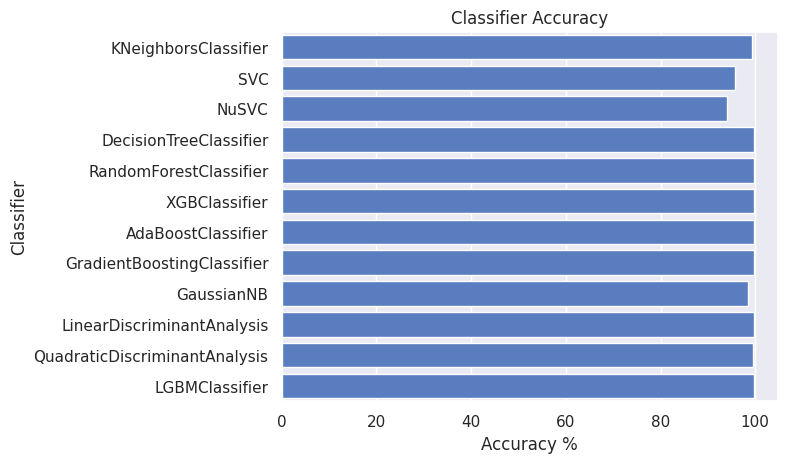

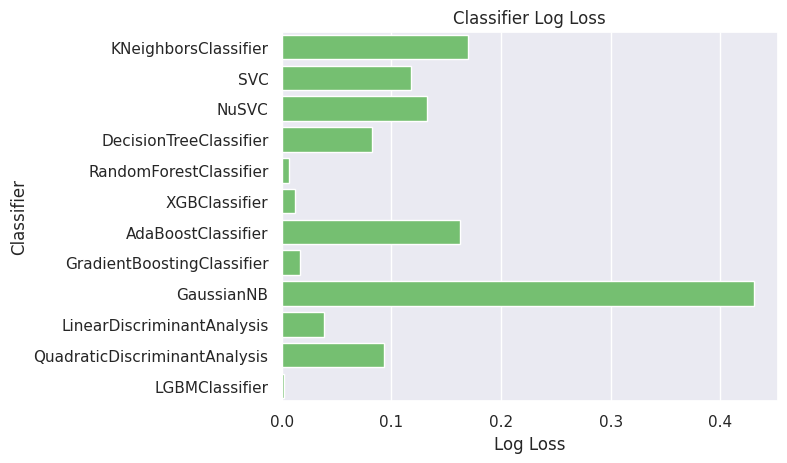

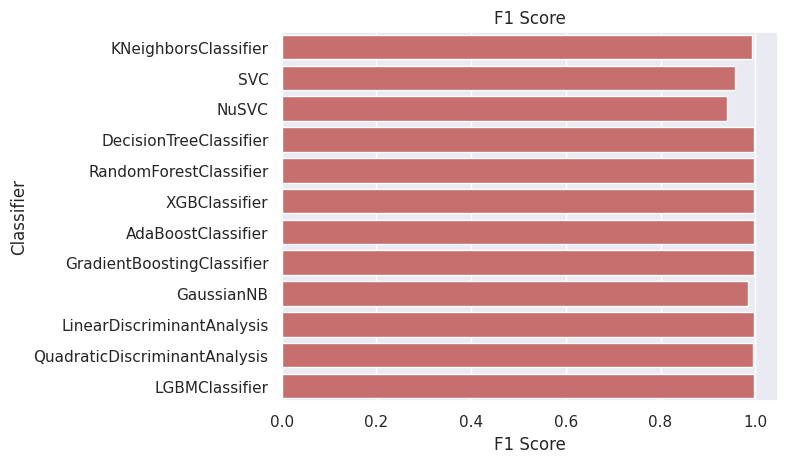

In [128]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score')
plt.title('F1 Score')
plt.show()

In [129]:
clf = LGBMClassifier()

# Fit with all the training set
clf.fit(X, y)


LGBMClassifier()

In [130]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))


Feature ranking:
count : (452.000000)
maxRssiValue : (258.000000)
minRssiValue : (209.000000)
maxTimeStamp : (106.000000)
minTimeStamp : (89.000000)
rssiDiff : (88.000000)
seenDiff : (81.000000)
antenna1 : (76.000000)
antenna2 : (68.000000)
antenna3 : (53.000000)
antenna4 : (46.000000)
ts_percent0 : (45.000000)
ts_percent1 : (41.000000)
ts_percent2 : (41.000000)
ts_percent3 : (37.000000)
ts_percent4 : (34.000000)
ts_percent5 : (25.000000)
ts_percent6 : (25.000000)
ts_percent7 : (23.000000)
ts_percent8 : (16.000000)
rv_percent0 : (15.000000)
rv_percent1 : (11.000000)
rv_percent2 : (9.000000)
rv_percent3 : (9.000000)
rv_percent4 : (9.000000)
rv_percent5 : (6.000000)
rv_percent6 : (5.000000)
rv_percent7 : (4.000000)
rv_percent8 : (0.000000)


Text(0.5, 0, 'index of the feature')

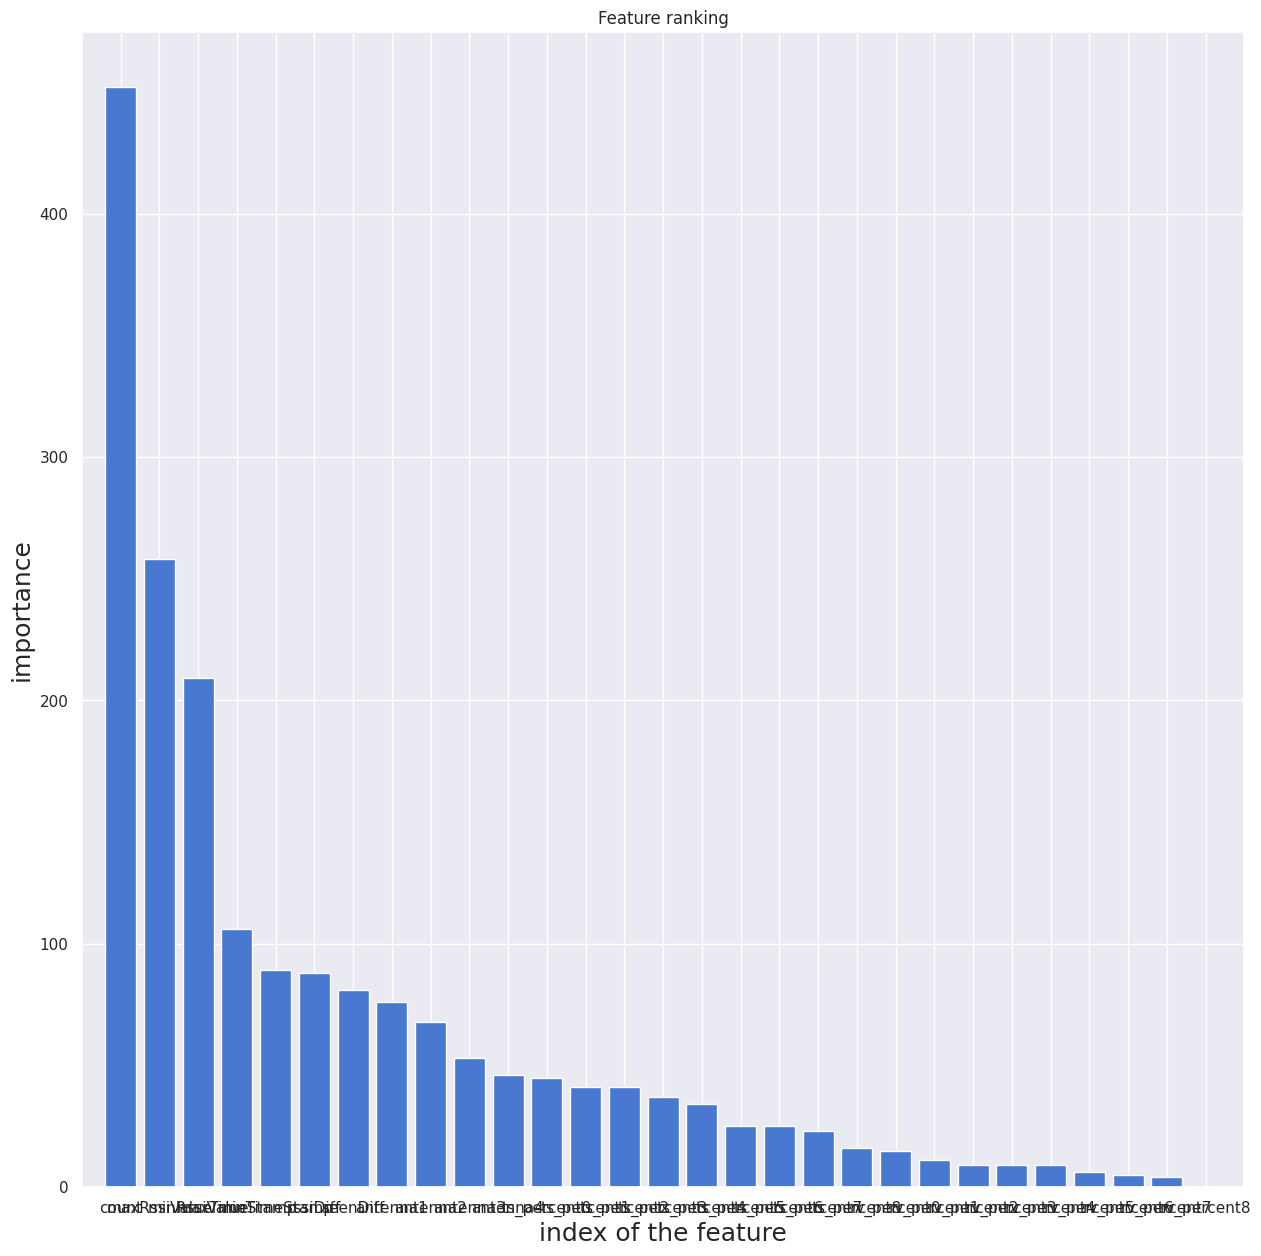

In [131]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b",
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)


In [132]:
df_epc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/epc.csv', engine='python')
df_epc.shape

(804691, 38)

In [133]:
df_epc.drop(['id', 'reference','epc','score', 'antennas', 'rssiValue', 'timeStamp', 'lastModification'], axis=1, inplace=True)
df_epc.shape

(804691, 30)

In [134]:
df_epc.isna().sum()

count               0
maxRssiValue        0
minRssiValue        0
maxTimeStamp        0
minTimeStamp        0
rssiDiff            0
seenDiff            0
antenna1            0
antenna2            0
antenna3            0
antenna4            0
ts_percent0         0
ts_percent1         0
ts_percent2         0
ts_percent3         0
ts_percent4         0
ts_percent5         0
ts_percent6         0
ts_percent7         0
ts_percent8         0
rv_percent0         0
rv_percent1         0
rv_percent2         0
rv_percent3         0
rv_percent4         0
rv_percent5         0
rv_percent6         0
rv_percent7         0
rv_percent8         0
desired         42138
dtype: int64

In [135]:
df_epc = df_epc.dropna(subset=['desired'])

In [136]:
df_epc["desired"] = df_epc["desired"].astype(int)

In [137]:
X_epc = df_epc.drop('desired', axis=1)
y_epc = df_epc['desired']
RS = 123

In [138]:
for col in X_epc.columns:
    X_epc[col] = labelencoder.fit_transform(X_epc[col])

df_epc.head()

,count,maxRssiValue,minRssiValue,maxTimeStamp,minTimeStamp,rssiDiff,seenDiff,antenna1,antenna2,antenna3,...,rv_percent0,rv_percent1,rv_percent2,rv_percent3,rv_percent4,rv_percent5,rv_percent6,rv_percent7,rv_percent8,desired
48,47,-40.0,-63.0,1328.793,0.000,23.0,1328.793,12,14,11,...,-59.4,-56.0,-54.0,-53.0,-51.0,-48.4,-47.0,-47.0,-45.6,1
49,47,-39.0,-64.0,1324.031,2.493,25.0,1321.538,12,12,11,...,-60.0,-54.0,-52.0,-51.0,-50.0,-46.4,-44.8,-43.0,-42.0,1
50,49,-40.0,-62.0,1330.868,5.026,22.0,1325.842,14,12,13,...,-59.0,-57.0,-54.0,-53.0,-52.0,-50.2,-49.4,-46.0,-42.8,1
51,41,-49.0,-68.0,1320.445,6.875,19.0,1313.570,7,11,11,...,-63.0,-61.0,-58.0,-57.0,-56.0,-54.0,-53.0,-52.0,-50.0,1
52,44,-41.0,-58.0,1294.029,8.387,17.0,1285.642,8,14,10,...,-55.7,-53.0,-52.1,-49.0,-48.0,-47.0,-45.9,-43.0,-42.0,1


<Axes: xlabel='desired', ylabel='count'>

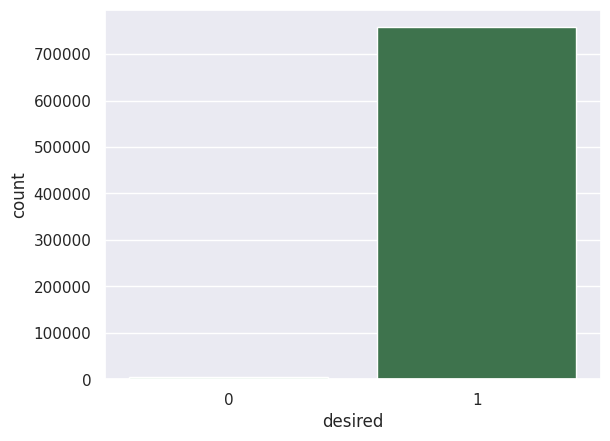

In [139]:
sns.countplot(x="desired", data=df_epc, palette="Greens_d")

In [140]:
class_dist = df_epc['desired'].value_counts()

print(class_dist)
prob_e = class_dist[0]/(class_dist[0]+class_dist[1])
prob_p = 1 - prob_e
print(prob_e)
print(prob_p)

1    757822
0      4731
Name: desired, dtype: int64
0.006204158924035444
0.9937958410759645


In [141]:
log_cols=["Classifier", "Accuracy Test", "Accuracy Real", "Log Loss Test", "Log Loss Real", "F1 Score Test", "F1 Score Real"]
log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc_test = accuracy_score(y_test, train_predictions)
    train_predictions_real = clf.predict(X_epc)
    acc_real = accuracy_score(y_epc, train_predictions_real)
    print("Accuracy Test: {:.4%}".format(acc_test))
    print("Accuracy Real: {:.4%}".format(acc_real))

    f1_test = f1_score(y_test, train_predictions)
    f1_real = f1_score(y_epc, train_predictions_real)
    print("F1 Score Test: {:.4%}".format(f1_test))
    print("F1 Score Real: {:.4%}".format(f1_real))

    train_predictions = clf.predict_proba(X_test)
    ll_test = log_loss(y_test, train_predictions)
    train_predictions_real = clf.predict_proba(X_epc)
    ll_real = log_loss(y_epc, train_predictions_real)
    print("Log Loss Test: {}".format(ll_test))
    print("Log Loss Real: {}".format(ll_real))


    log_entry = pd.DataFrame([[name, acc_test*100, acc_real*100, ll_test, ll_real, f1_test, f1_real]], columns=log_cols)
    log = log.append(log_entry) # type: ignore
    name = clf.__class__.__name__

    print("="*30)

KNeighborsClassifier
****Results****
Accuracy Test: 99.3119%
Accuracy Real: 90.8872%
F1 Score Test: 99.3135%
F1 Score Real: 95.2055%
Log Loss Test: 0.16971754422733681
Log Loss Real: 1.11129305388887
SVC
****Results****
Accuracy Test: 95.6422%
Accuracy Real: 0.6207%
F1 Score Test: 95.6322%
F1 Score Real: 0.0026%
Log Loss Test: 0.1178716946191008
Log Loss Real: 1.4618092944924546
NuSVC
****Results****
Accuracy Test: 94.0367%
Accuracy Real: 0.6205%
F1 Score Test: 94.0092%
F1 Score Real: 0.0026%
Log Loss Test: 0.1322252491362401
Log Loss Real: 1.1554445666928914
DecisionTreeClassifier
****Results****
Accuracy Test: 99.7706%
Accuracy Real: 96.8889%
F1 Score Test: 99.7722%
F1 Score Real: 98.4123%
Log Loss Test: 0.08266892979155334
Log Loss Real: 1.1213641976405775
RandomForestClassifier
****Results****
Accuracy Test: 99.7706%
Accuracy Real: 98.9736%
F1 Score Test: 99.7722%
F1 Score Real: 99.4824%
Log Loss Test: 0.008557580303076871
Log Loss Real: 0.05901524866814742
XGBClassifier
****Result

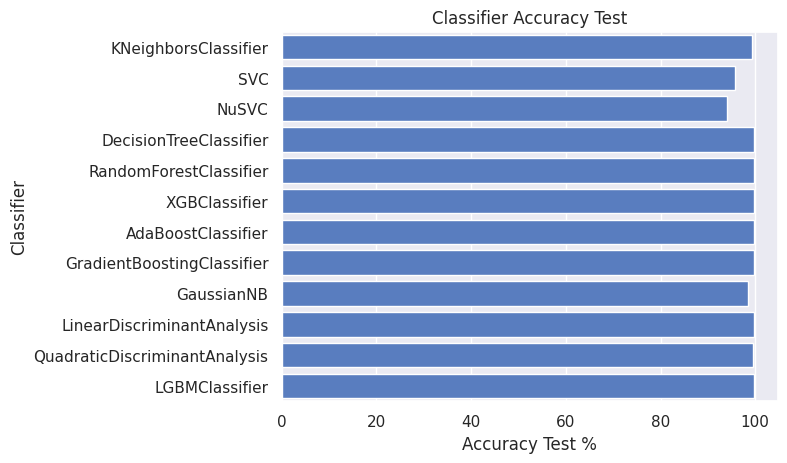

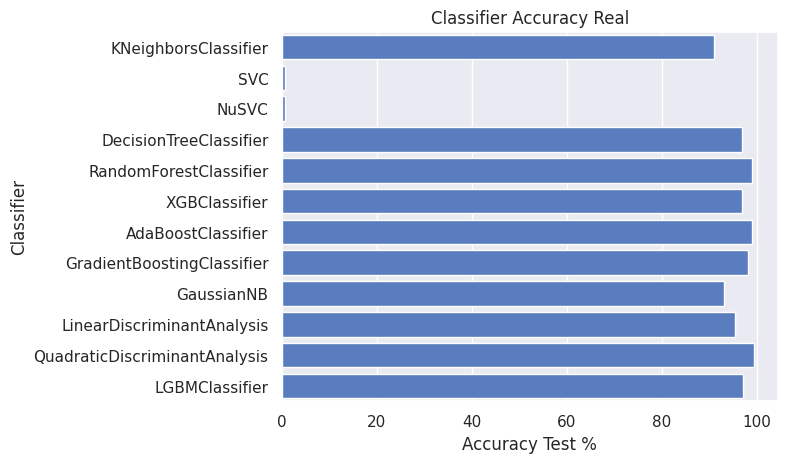

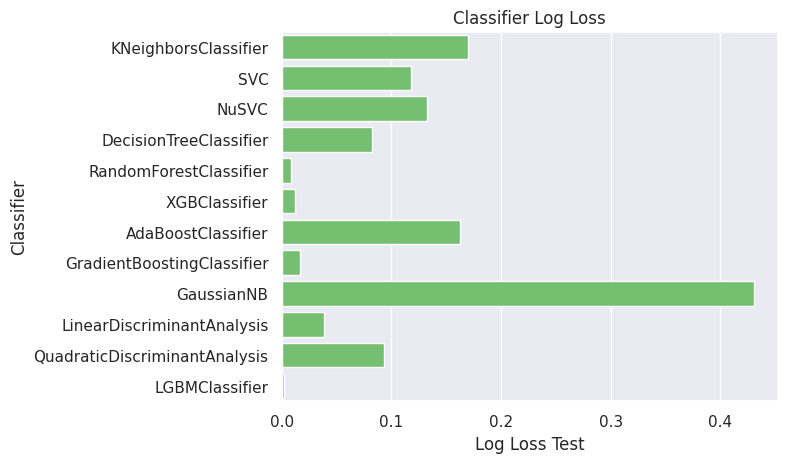

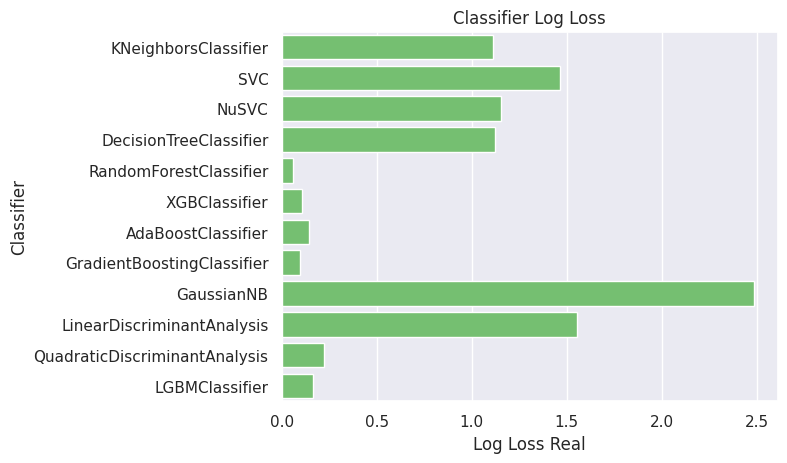

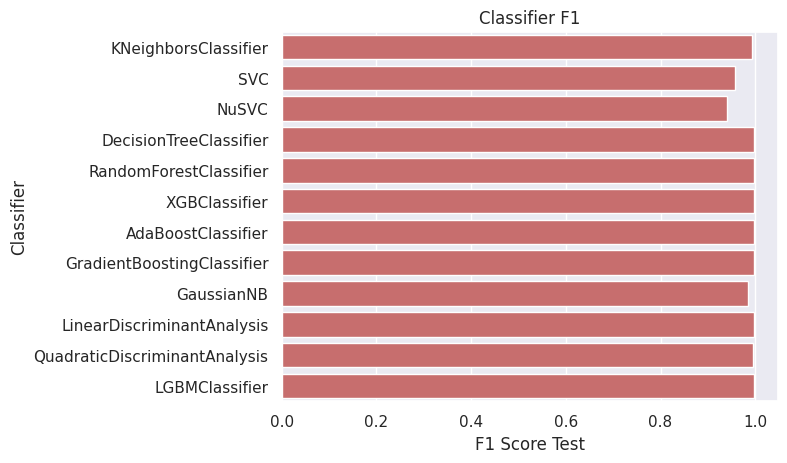

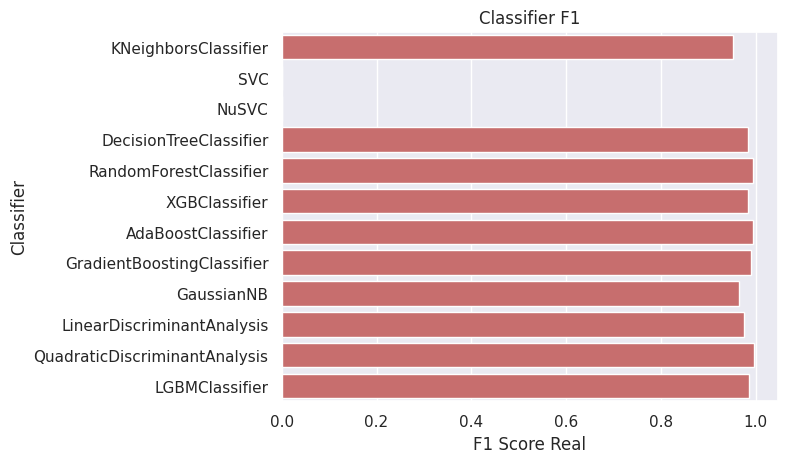

In [143]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy Test', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy Test %')
plt.title('Classifier Accuracy Test')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Accuracy Real', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy Test %')
plt.title('Classifier Accuracy Real')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss Test', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss Test')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss Real', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss Real')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score Test', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score Test')
plt.title('Classifier F1')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score Real', y='Classifier', data=log, color="r")

plt.xlabel('F1 Score Real')
plt.title('Classifier F1')
plt.show()